In [83]:
# Project Title: Profit Optimization for Targeted Mail Campaign.

# Created by Kunisuke Ishigaki

# Background
# Client: A supermarket company
# Issue: the client has conducted a mail campaign with credit cards offers without segmenting its customers in the past, resulting in a not too profitable outcome
# Research goal of this project: Analyzing customers' data to identify customers' trait in accepting/rejecting the credit cards offer and predict the profitability of the future mail campaign
# with the segmentation of customers
# Data received: We received 2 sets of data from the client. For one of the set, we will use it to create and fine-tuning the model. For the other set, we will use it to predict the probability of customers accepting the mail campaign to calculate the profitability
# Essential information 1: The client sending out a email to a customer costs $1 while the client can receive $12.5 per offer accepted by customers. 
# Essential information 2: In the past campaign, the client sent out 10,000 mails to customers and had 882 customers accepted the offers.
# Essential information 3: The client wants to conduct a new mail campaign targeting towards 10,000 perspective customers who have not been contacted for the credit card offer campaign


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score



In [85]:
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv("Supermarket_Training.csv")
df


,ID,Year_Birth,Age,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntOtherProds,NumStorePurchases,NumDealPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,MntTotal,ResponseCC
0,1,1961,63,0,0,1/09/2022,10672,115,1472,161,0,851,3,35,14,6,7,13271,0
1,9,1975,49,1,1,4/11/2020,1311,0,621,0,0,828,12,56,6,4,2,2760,0
2,13,1947,77,0,1,8/10/2021,437,0,115,0,0,184,6,42,2,0,3,736,0
3,17,1971,53,0,1,23/11/2021,14651,1081,5451,276,437,1748,12,35,12,22,7,23644,0
4,20,1965,59,0,1,18/11/2021,989,276,529,667,345,1403,3,28,4,2,4,4209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,11121,1981,43,1,0,27/01/2021,46,322,644,368,69,161,12,63,8,0,3,1610,0
1133,11166,1961,63,0,1,21/04/2021,5267,115,1288,69,46,460,6,49,12,4,4,7245,0
1134,11171,1965,59,2,1,28/12/2021,6716,69,1771,230,69,598,21,49,12,6,5,9453,0
1135,11181,1949,75,0,0,15/11/2021,46,23,46,23,23,23,0,0,0,0,0,184,0


In [87]:
# Understand what variables are there 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1137 non-null   int64 
 1   Year_Birth           1137 non-null   int64 
 2   Age                  1137 non-null   int64 
 3   Kidhome              1137 non-null   int64 
 4   Teenhome             1137 non-null   int64 
 5   Dt_Customer          1137 non-null   object
 6   MntWines             1137 non-null   int64 
 7   MntFruits            1137 non-null   int64 
 8   MntMeatProducts      1137 non-null   int64 
 9   MntFishProducts      1137 non-null   int64 
 10  MntSweetProducts     1137 non-null   int64 
 11  MntOtherProds        1137 non-null   int64 
 12  NumStorePurchases    1137 non-null   int64 
 13  NumDealPurchases     1137 non-null   int64 
 14  NumWebPurchases      1137 non-null   int64 
 15  NumCatalogPurchases  1137 non-null   int64 
 16  NumWeb

In [88]:
# Statistics of variable
df.describe()

,ID,Year_Birth,Age,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntOtherProds,NumStorePurchases,NumDealPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,MntTotal,ResponseCC
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,5532.158311,1969.123131,54.876869,0.424802,0.511873,7080.480211,616.205805,3761.359719,847.075638,624.600704,1040.380827,6.973615,37.401055,8.332454,5.298153,5.834653,13970.102902,0.087951
std,3244.980234,11.760999,11.760999,0.523918,0.537412,7798.052369,908.440950,4972.628882,1232.080651,943.031143,1204.492790,5.806232,17.176874,5.664189,5.484608,3.269701,13752.488709,0.283348
min,1.000000,1940.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,0.000000
25%,2811.000000,1959.000000,46.000000,0.000000,0.000000,552.000000,46.000000,368.000000,69.000000,23.000000,230.000000,3.000000,28.000000,4.000000,0.000000,3.000000,1656.000000,0.000000
50%,5329.000000,1970.000000,54.000000,0.000000,0.000000,4140.000000,184.000000,1541.000000,276.000000,184.000000,598.000000,6.000000,42.000000,8.000000,4.000000,5.000000,9315.000000,0.000000
75%,8315.000000,1978.000000,65.000000,1.000000,1.000000,11845.000000,805.000000,5129.000000,1127.000000,805.000000,1311.000000,9.000000,49.000000,12.000000,8.000000,8.000000,23782.000000,0.000000
max,11187.000000,1996.000000,84.000000,2.000000,2.000000,34339.000000,4577.000000,22632.000000,5957.000000,6026.000000,7383.000000,45.000000,140.000000,54.000000,22.000000,13.000000,58075.000000,1.000000


In [89]:
# Copy of df - use for EDA
newdf = df.copy()


ID and Dt_Customer are irrelevant to whether customers will respond the directed mail. Therefore, we will exclude ID and Dt_Customer from the dataset

In [90]:
newdf = newdf.drop(columns=["ID", "Dt_Customer"])
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year_Birth           1137 non-null   int64
 1   Age                  1137 non-null   int64
 2   Kidhome              1137 non-null   int64
 3   Teenhome             1137 non-null   int64
 4   MntWines             1137 non-null   int64
 5   MntFruits            1137 non-null   int64
 6   MntMeatProducts      1137 non-null   int64
 7   MntFishProducts      1137 non-null   int64
 8   MntSweetProducts     1137 non-null   int64
 9   MntOtherProds        1137 non-null   int64
 10  NumStorePurchases    1137 non-null   int64
 11  NumDealPurchases     1137 non-null   int64
 12  NumWebPurchases      1137 non-null   int64
 13  NumCatalogPurchases  1137 non-null   int64
 14  NumWebVisitsMonth    1137 non-null   int64
 15  MntTotal             1137 non-null   int64
 16  ResponseCC           113

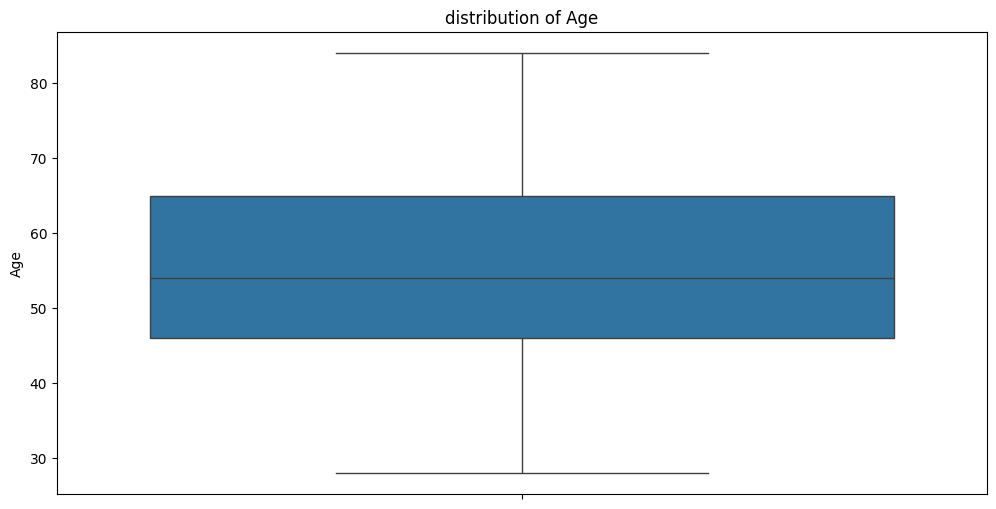

In [91]:
# identify outlier - check distribution


# Age
def format_funct(value, _):
    return f'{value:,.0f}'

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['Age'])
plt.title("distribution of Age")
plt.ylabel("Age")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

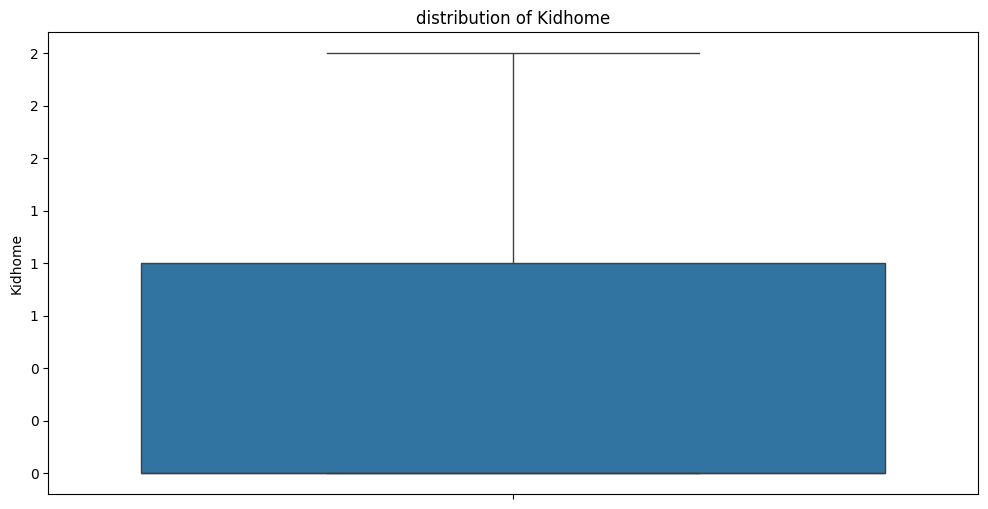

In [92]:
# Kidhome

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['Kidhome'])
plt.title("distribution of Kidhome")
plt.ylabel("Kidhome")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

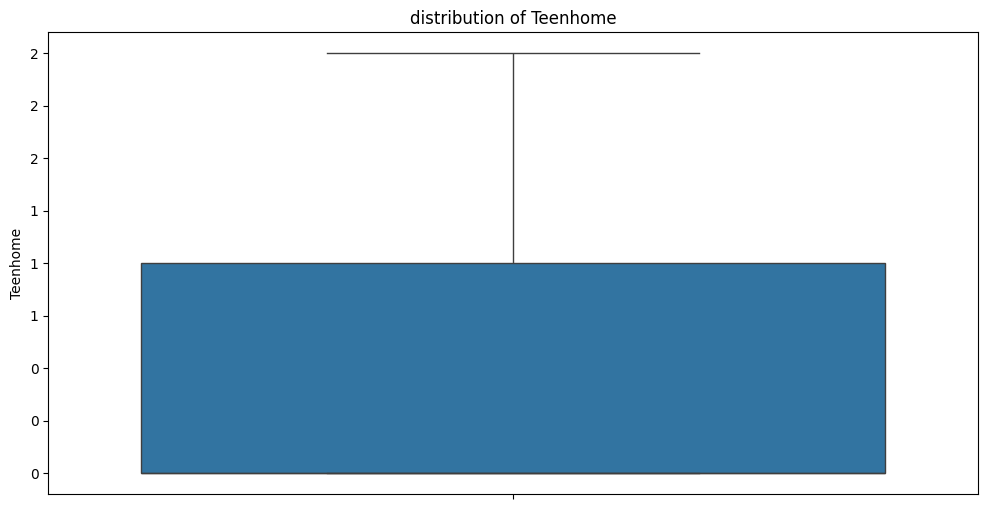

In [93]:
# Teenhome

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['Teenhome'])
plt.title("distribution of Teenhome")
plt.ylabel("Teenhome")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

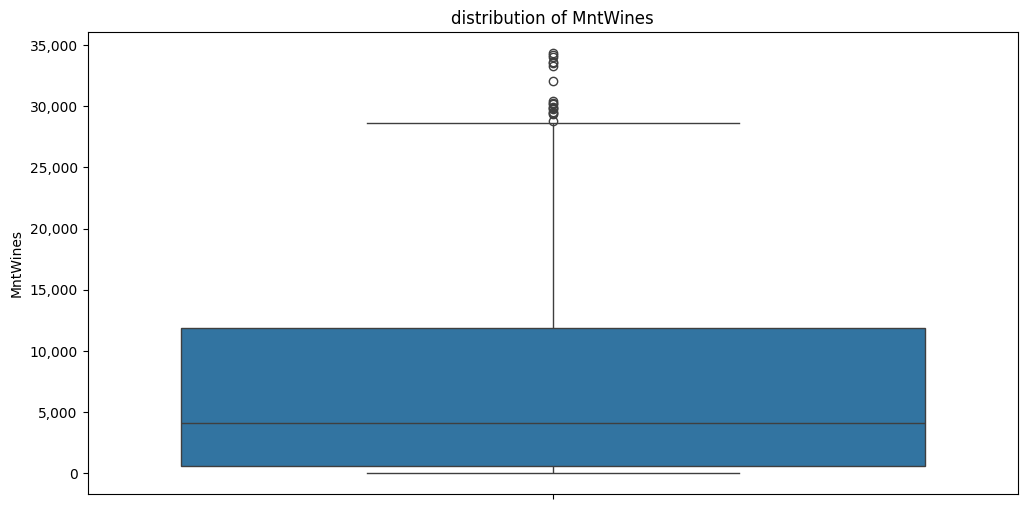

In [94]:
# MntWines
# we see some data in MntWine is heavily skewed
# we will adjust records that are out of upper bounds to mean value of this variable

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['MntWines'])
plt.title("distribution of MntWines")
plt.ylabel("MntWines")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

In [95]:
val = 'MntWines'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print("After adjustment")
print(newdf[val].describe())

upper_bound: 28784.5
how many rows need to be modified? 17
Pre adjustment
count     1137.000000
mean      7080.480211
std       7798.052369
min          0.000000
25%        552.000000
50%       4140.000000
75%      11845.000000
max      34339.000000
Name: MntWines, dtype: float64
After adjustment
count     1137.000000
mean      6717.848869
std       7198.416897
min          0.000000
25%        552.000000
50%       4140.000000
75%      11316.000000
max      28635.000000
Name: MntWines, dtype: float64


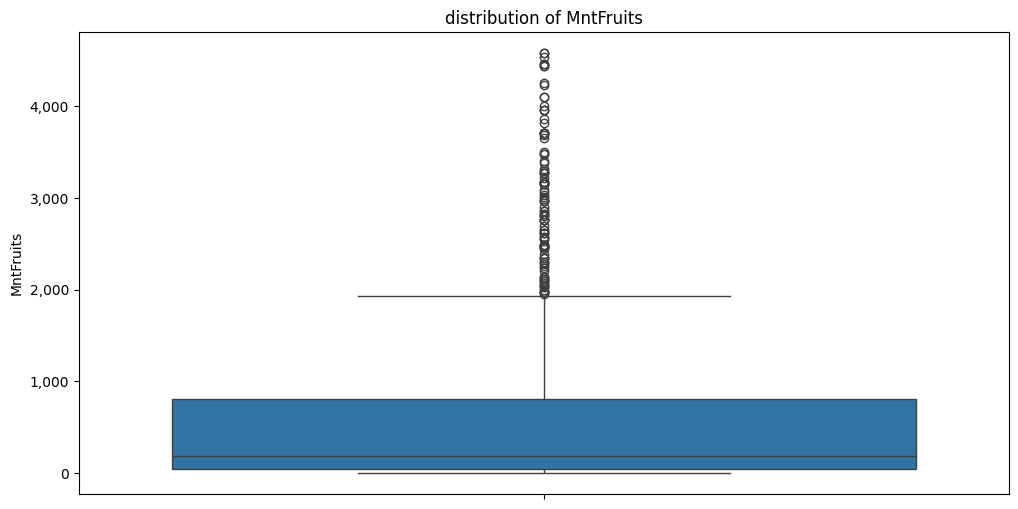

In [96]:
# MntFruits
# we see some data in MntWine is heavily skewed

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['MntFruits'])
plt.title("distribution of MntFruits")
plt.ylabel("MntFruits")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

In [97]:
val = 'MntFruits'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 1943.5
how many rows need to be modified? 105
Pre adjustment
count    1137.000000
mean      616.205805
std       908.440950
min         0.000000
25%        46.000000
50%       184.000000
75%       805.000000
max      4577.000000
Name: MntFruits, dtype: float64

After adjustment
count    1137.000000
mean      398.709419
std       464.696534
min         0.000000
25%        46.000000
50%       184.000000
75%       616.205805
max      1932.000000
Name: MntFruits, dtype: float64


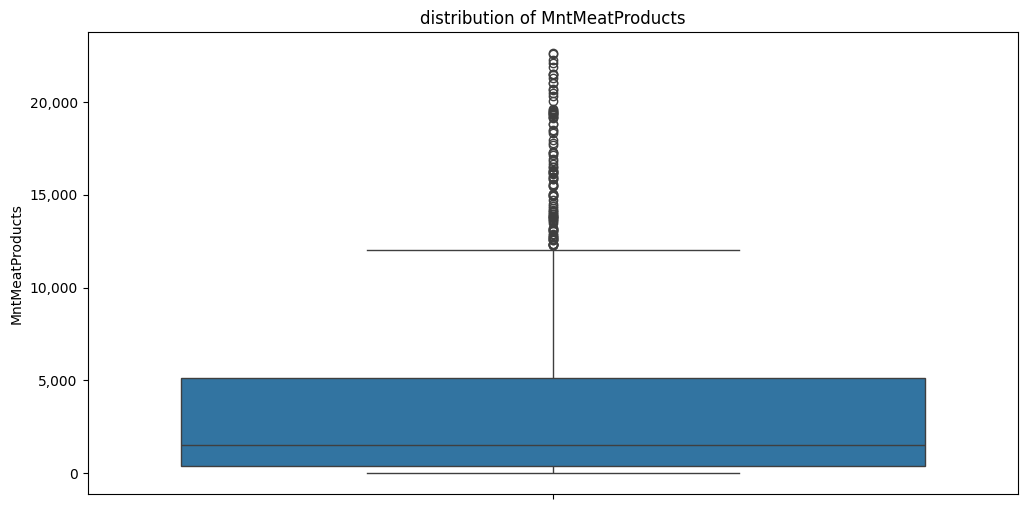

In [98]:
# MntMeatProducts
# we see some data in MntMeatProducts is heavily skewed

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['MntMeatProducts'])
plt.title("distribution of MntMeatProducts")
plt.ylabel("MntMeatProducts")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

In [99]:
val = 'MntMeatProducts'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 12270.5
how many rows need to be modified? 103
Pre adjustment
count     1137.000000
mean      3761.359719
std       4972.628882
min          0.000000
25%        368.000000
50%       1541.000000
75%       5129.000000
max      22632.000000
Name: MntMeatProducts, dtype: float64

After adjustment
count     1137.000000
mean      2616.525111
std       2845.800912
min          0.000000
25%        368.000000
50%       1541.000000
75%       3761.359719
max      12006.000000
Name: MntMeatProducts, dtype: float64


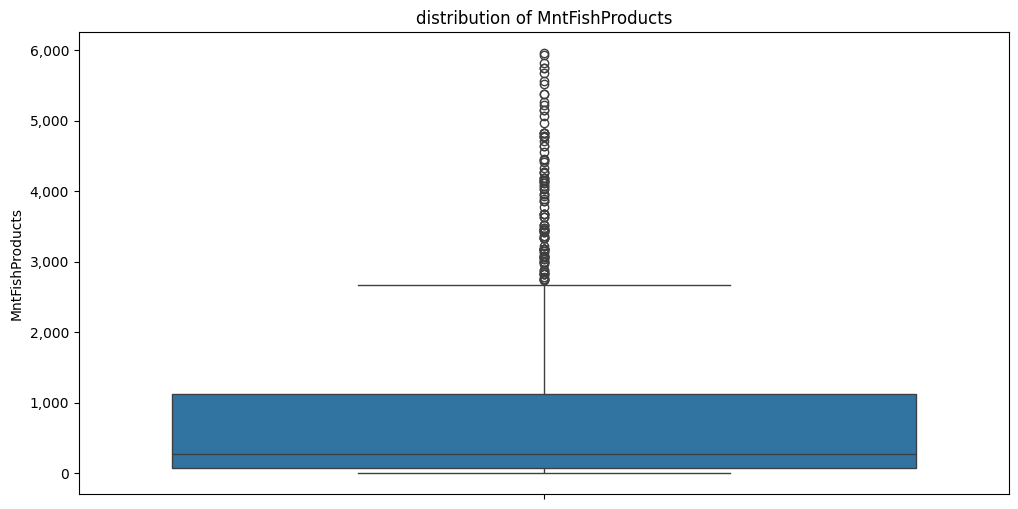

In [100]:
# MntFishProducts
# we see some data in MntFishProducts is heavily skewed

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['MntFishProducts'])
plt.title("distribution of MntFishProducts")
plt.ylabel("MntFishProducts")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

In [101]:
val = 'MntFishProducts'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 2714.0
how many rows need to be modified? 119
Pre adjustment
count    1137.000000
mean      847.075638
std      1232.080651
min         0.000000
25%        69.000000
50%       276.000000
75%      1127.000000
max      5957.000000
Name: MntFishProducts, dtype: float64

After adjustment
count    1137.000000
mean      530.126650
std       615.223212
min         0.000000
25%        69.000000
50%       276.000000
75%       847.075638
max      2668.000000
Name: MntFishProducts, dtype: float64


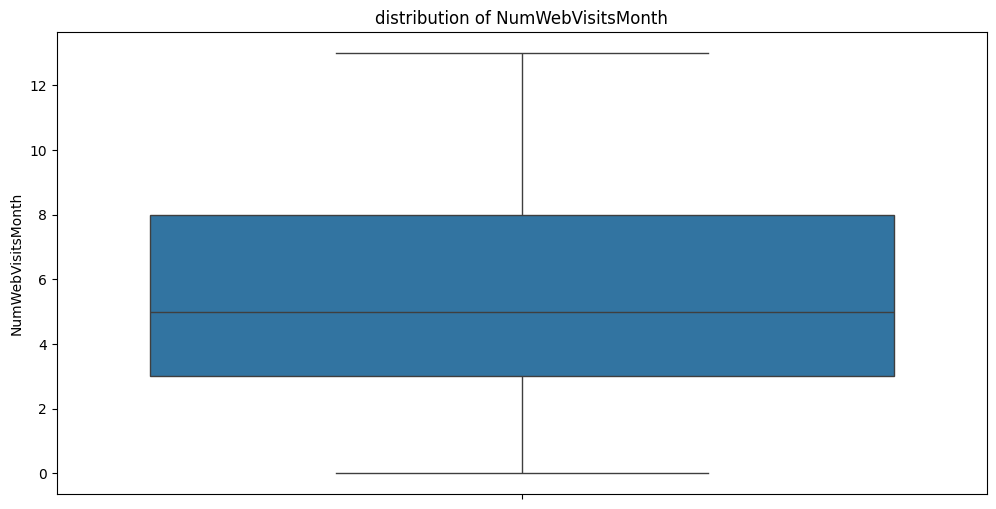

In [102]:
# NumWebVisitsMonth
# we see some data in NumWebVisitsMonth is heavily skewed

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['NumWebVisitsMonth'])
plt.title("distribution of NumWebVisitsMonth")
plt.ylabel("NumWebVisitsMonth")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()


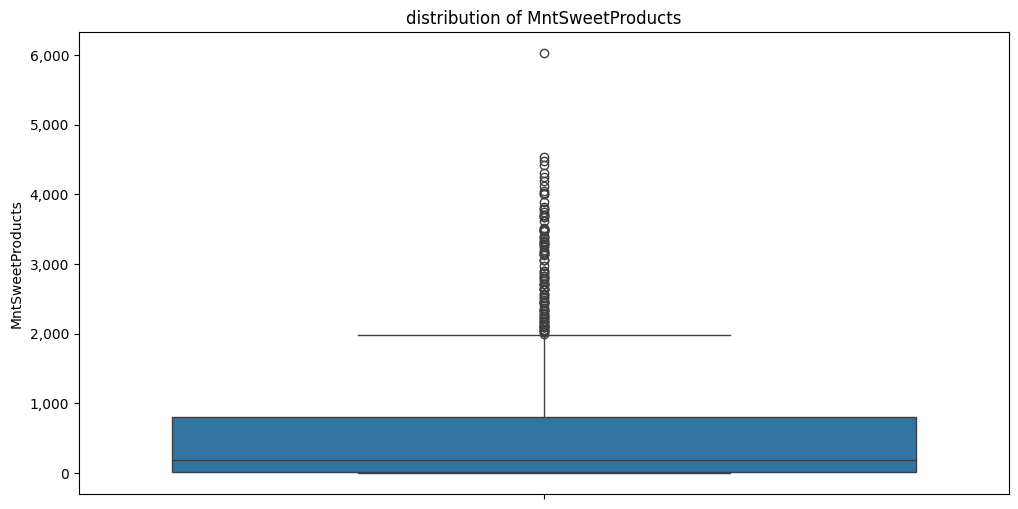

In [103]:
# MntSweetProducts
# we see some data is heavily skewed
# we will adjust records that are out of upper bounds to mean value of this variable

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['MntSweetProducts'])
plt.title("distribution of MntSweetProducts")
plt.ylabel("MntSweetProducts")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()


In [104]:
val = 'MntSweetProducts'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 1978.0
how many rows need to be modified? 119
Pre adjustment
count    1137.000000
mean      624.600704
std       943.031143
min         0.000000
25%        23.000000
50%       184.000000
75%       805.000000
max      6026.000000
Name: MntSweetProducts, dtype: float64

After adjustment
count    1137.000000
mean      379.725140
std       448.171930
min         0.000000
25%        23.000000
50%       184.000000
75%       624.600704
max      1978.000000
Name: MntSweetProducts, dtype: float64


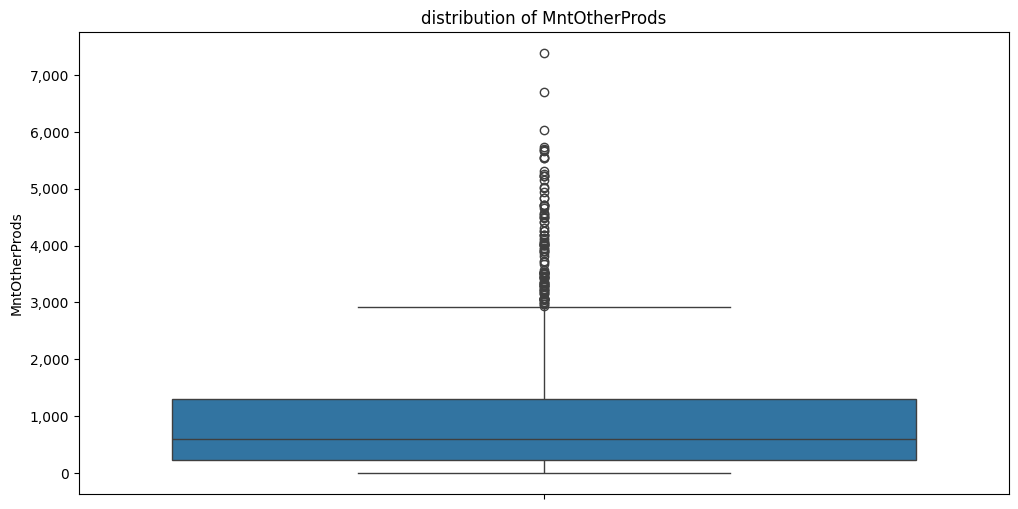

In [105]:
# MntOtherProds
# we see some data is heavily skewed
# we will adjust records that are out of upper bounds to mean value of this variable

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['MntOtherProds'])
plt.title("distribution of MntOtherProds")
plt.ylabel("MntOtherProds")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()


In [106]:
val = 'MntOtherProds'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 2932.5
how many rows need to be modified? 110
Pre adjustment
count    1137.000000
mean     1040.380827
std      1204.492790
min         0.000000
25%       230.000000
50%       598.000000
75%      1311.000000
max      7383.000000
Name: MntOtherProds, dtype: float64

After adjustment
count    1137.000000
mean      751.206588
std       651.666862
min         0.000000
25%       230.000000
50%       598.000000
75%      1040.380827
max      2921.000000
Name: MntOtherProds, dtype: float64


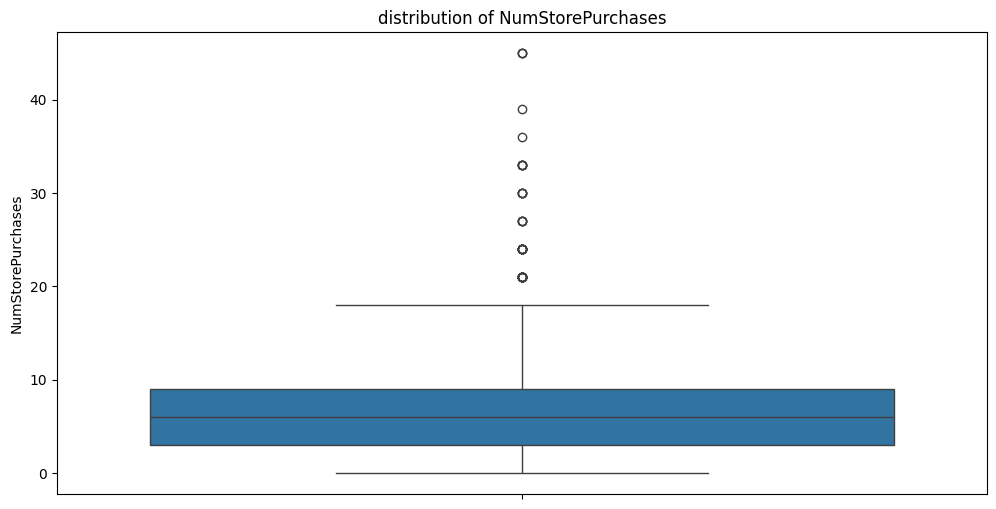

In [107]:
# NumStorePurchases
# we see some data is heavily skewed
# we will adjust records that are out of upper bounds to mean value of this variable

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['NumStorePurchases'])
plt.title("distribution of NumStorePurchases")
plt.ylabel("NumStorePurchases")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()


In [108]:
val = 'NumStorePurchases'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 18.0
how many rows need to be modified? 45
Pre adjustment
count    1137.000000
mean        6.973615
std         5.806232
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        45.000000
Name: NumStorePurchases, dtype: float64

After adjustment
count    1137.000000
mean        6.194206
std         3.985534
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: NumStorePurchases, dtype: float64


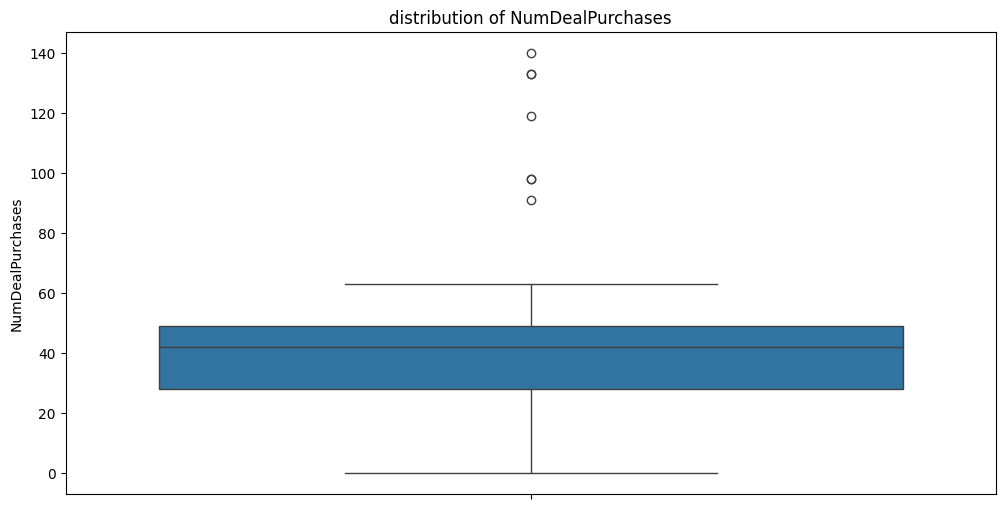

In [109]:
# NumDealPurchases
# we see some data is heavily skewed
# we will adjust records that are out of upper bounds to mean value of this variable

plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['NumDealPurchases'])
plt.title("distribution of NumDealPurchases")
plt.ylabel("NumDealPurchases")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

In [110]:
val = 'NumDealPurchases'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 80.5
how many rows need to be modified? 7
Pre adjustment
count    1137.000000
mean       37.401055
std        17.176874
min         0.000000
25%        28.000000
50%        42.000000
75%        49.000000
max       140.000000
Name: NumDealPurchases, dtype: float64

After adjustment
count    1137.000000
mean       36.917157
std        15.956155
min         0.000000
25%        28.000000
50%        42.000000
75%        49.000000
max        63.000000
Name: NumDealPurchases, dtype: float64


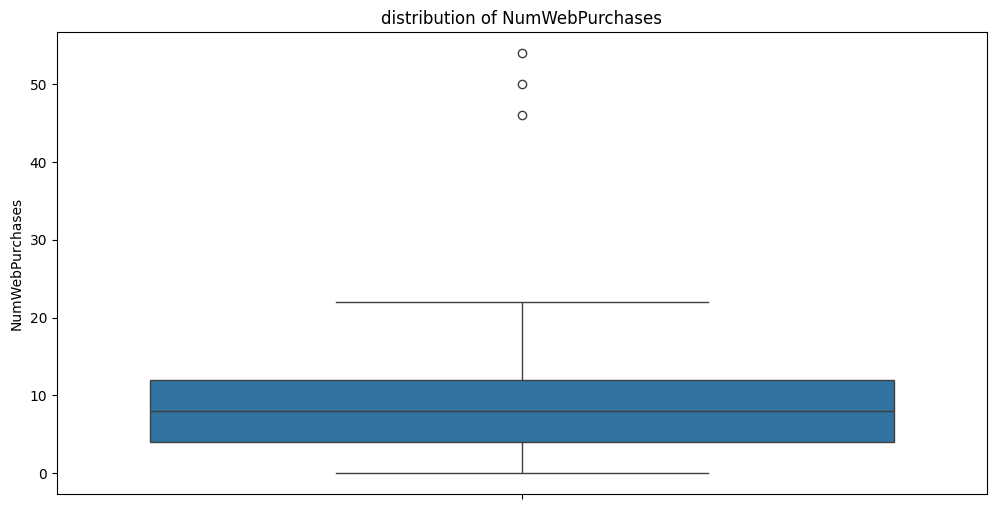

In [111]:
# NumWebPurchases
plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['NumWebPurchases'])
plt.title("distribution of NumWebPurchases")
plt.ylabel("NumWebPurchases")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

In [112]:
val = 'NumWebPurchases'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 24.0
how many rows need to be modified? 3
Pre adjustment
count    1137.000000
mean        8.332454
std         5.664189
min         0.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        54.000000
Name: NumWebPurchases, dtype: float64

After adjustment
count    1137.000000
mean        8.222513
std         5.240017
min         0.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        22.000000
Name: NumWebPurchases, dtype: float64


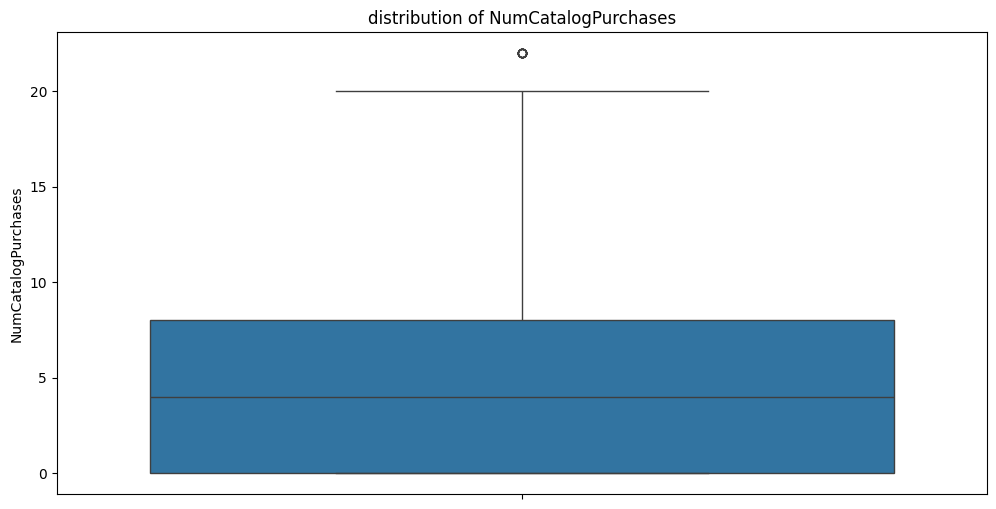

In [113]:
# NumCatalogPurchases
plt.figure(figsize=(12, 6))
sns.boxplot(data=newdf['NumCatalogPurchases'])
plt.title("distribution of NumCatalogPurchases")
plt.ylabel("NumCatalogPurchases")

plt.gca().yaxis.set_major_formatter(formatter=(format_funct))

plt.show()

In [114]:
val = 'NumCatalogPurchases'
Q3 = newdf[val].quantile(0.75)
Q1 = newdf[val].quantile(0.25)

# Calculate the IQR
IQR = Q3 - Q1

# Filter out records beyond 1.5*IQR above Q3 
upper_bound = Q3 + 1.5* IQR
print(f'upper_bound: {upper_bound}')

# check how many rows are outside the the upper bounds
copy_newdf = newdf[newdf[val] > upper_bound]
print(f'how many rows need to be modified? {copy_newdf.shape[0]}')

print("Pre adjustment")
print(newdf[val].describe())

# df.describe() to find the mean of the variable - this value will replace the records that are above upper bound with mean value of variable
mean_value = newdf[val].mean()
newdf[val] = newdf[val].apply(lambda x: mean_value if x > upper_bound else x)

# check the max to see if it is adjusted
print()
print("After adjustment")
print(newdf[val].describe())

upper_bound: 20.0
how many rows need to be modified? 10
Pre adjustment
count    1137.000000
mean        5.298153
std         5.484608
min         0.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        22.000000
Name: NumCatalogPurchases, dtype: float64

After adjustment
count    1137.000000
mean        5.151259
std         5.253928
min         0.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        20.000000
Name: NumCatalogPurchases, dtype: float64


In [115]:
# Checking the correlation of Year_Birth and Age to see if the data has a perfect correlation which indicates the variable being overlapping and redundant.
correlation = newdf['Age'].corr(newdf['Year_Birth'])
correlation



np.float64(-1.0)

It is almost perfectly negative correlated. Therefore, we should exclude one of the variables from the dataset. 
We will exclude Year_Birth this time.

In [116]:
newdf = newdf.drop(columns="Year_Birth")
newdf

,Age,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntOtherProds,NumStorePurchases,NumDealPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,MntTotal,ResponseCC
0,63,0,0,10672.0,115.0,1472.0,161.0,0.0,851.0,3.000000,35.0,14.0,6.000000,7,13271,0
1,49,1,1,1311.0,0.0,621.0,0.0,0.0,828.0,12.000000,56.0,6.0,4.000000,2,2760,0
2,77,0,1,437.0,0.0,115.0,0.0,0.0,184.0,6.000000,42.0,2.0,0.000000,3,736,0
3,53,0,1,14651.0,1081.0,5451.0,276.0,437.0,1748.0,12.000000,35.0,12.0,5.298153,7,23644,0
4,59,0,1,989.0,276.0,529.0,667.0,345.0,1403.0,3.000000,28.0,4.0,2.000000,4,4209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,43,1,0,46.0,322.0,644.0,368.0,69.0,161.0,12.000000,63.0,8.0,0.000000,3,1610,0
1133,63,0,1,5267.0,115.0,1288.0,69.0,46.0,460.0,6.000000,49.0,12.0,4.000000,4,7245,0
1134,59,2,1,6716.0,69.0,1771.0,230.0,69.0,598.0,6.973615,49.0,12.0,6.000000,5,9453,0
1135,75,0,0,46.0,23.0,46.0,23.0,23.0,23.0,0.000000,0.0,0.0,0.000000,0,184,0


In [117]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1137 non-null   int64  
 1   Kidhome              1137 non-null   int64  
 2   Teenhome             1137 non-null   int64  
 3   MntWines             1137 non-null   float64
 4   MntFruits            1137 non-null   float64
 5   MntMeatProducts      1137 non-null   float64
 6   MntFishProducts      1137 non-null   float64
 7   MntSweetProducts     1137 non-null   float64
 8   MntOtherProds        1137 non-null   float64
 9   NumStorePurchases    1137 non-null   float64
 10  NumDealPurchases     1137 non-null   float64
 11  NumWebPurchases      1137 non-null   float64
 12  NumCatalogPurchases  1137 non-null   float64
 13  NumWebVisitsMonth    1137 non-null   int64  
 14  MntTotal             1137 non-null   int64  
 15  ResponseCC           1137 non-null   i

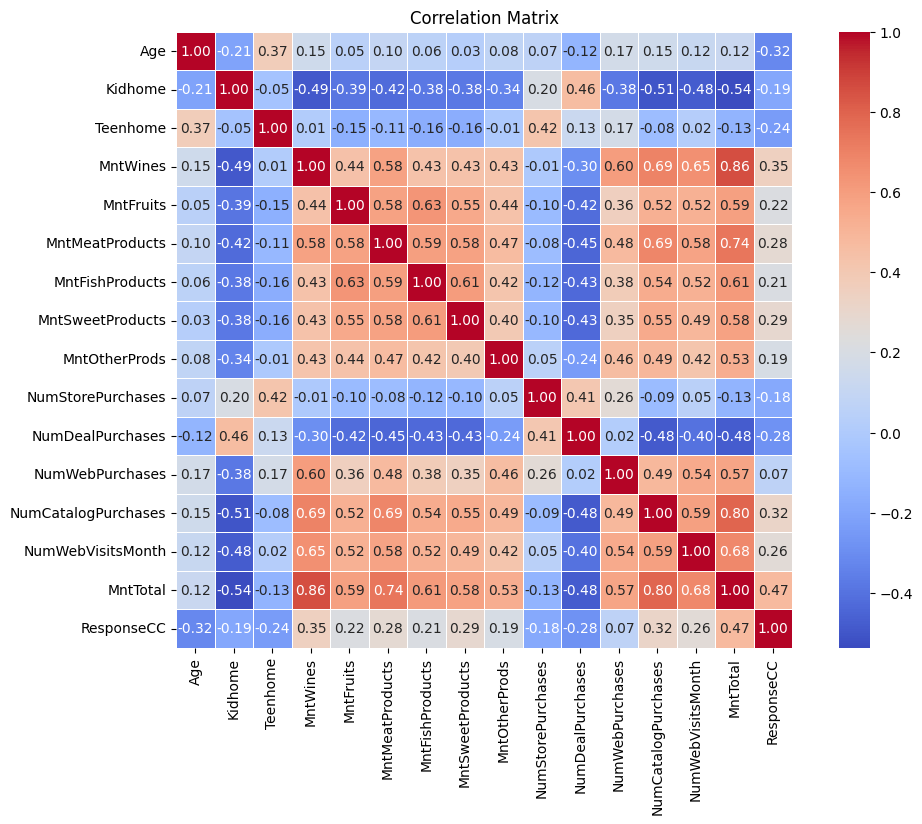

In [118]:
# Check the correlation of variables
corr_matrix = newdf.corr()

plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt='.2f', square=True, linewidths=0.5)

plt.title("Correlation Matrix")

plt.show()

we found that the combinations of (MntTotal,  MntWines) and (MntTotal, NumCatlogPurchase) have cor > 0.8 meaning they are highly correlated. 

Therefore, we should consider to avoid adding one of the variable to the model.

In this case, we will drop MntTotal from being added to the model as it appeared in both combinations.


In [119]:
newdf = newdf.drop(columns="MntTotal")
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1137 non-null   int64  
 1   Kidhome              1137 non-null   int64  
 2   Teenhome             1137 non-null   int64  
 3   MntWines             1137 non-null   float64
 4   MntFruits            1137 non-null   float64
 5   MntMeatProducts      1137 non-null   float64
 6   MntFishProducts      1137 non-null   float64
 7   MntSweetProducts     1137 non-null   float64
 8   MntOtherProds        1137 non-null   float64
 9   NumStorePurchases    1137 non-null   float64
 10  NumDealPurchases     1137 non-null   float64
 11  NumWebPurchases      1137 non-null   float64
 12  NumCatalogPurchases  1137 non-null   float64
 13  NumWebVisitsMonth    1137 non-null   int64  
 14  ResponseCC           1137 non-null   int64  
dtypes: float64(10), int64(5)
memory usage:

In [120]:
# Total sample
newdf.shape[0]

1137

In [121]:
copy_newdf = newdf[newdf['ResponseCC'] == 1]
copy_newdf

,Age,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntOtherProds,NumStorePurchases,NumDealPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,ResponseCC
38,35,0,0,11339.0,1610.000000,7452.000000,847.075638,920.000000,1932.000000,3.0,7.0,6.0,14.0,11,1
53,38,0,0,24380.0,1403.000000,3761.359719,1840.000000,460.000000,2323.000000,3.0,7.0,8.0,14.0,10,1
54,36,0,0,9982.0,616.205805,9200.000000,1035.000000,624.600704,1035.000000,3.0,7.0,6.0,8.0,10,1
56,46,0,0,6141.0,874.000000,3761.359719,847.075638,624.600704,1449.000000,3.0,21.0,10.0,8.0,10,1
61,33,0,0,16192.0,616.205805,3761.359719,847.075638,1702.000000,2553.000000,3.0,14.0,10.0,12.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,30,0,0,17710.0,667.000000,3761.359719,847.075638,621.000000,552.000000,3.0,21.0,14.0,6.0,7,1
1082,43,0,1,6371.0,483.000000,1472.000000,1426.000000,483.000000,575.000000,6.0,21.0,6.0,4.0,10,1
1116,41,0,0,5865.0,713.000000,10258.000000,920.000000,1288.000000,1040.380827,3.0,7.0,6.0,20.0,11,1
1122,36,0,0,9982.0,616.205805,9200.000000,1035.000000,624.600704,1035.000000,3.0,7.0,6.0,8.0,10,1


We found 100 people responded yes out of 1137 sample size.
If we send out the offer with untargeted campaign, we will get the profit of 100 * 12.5 - 1137 * 1 = $113


Assumption - 

We exclude ID(not relevant to the result), Year_Birth(Redundant), Dt_customer(not relevant to the result), MntTotal(highly correlated) from adding to our model.

We assume that the sample data received from the supermarket is representative of total population of supermarket's customer base.

We converted all variables to the comparable metric scale.

We checked the distribution of each variable to see if there is any outlier and smoother out the outliers of certain variables.

We checked the multicollinearity of variables and exclude one variable from adding to our model.

Process - 

Firstly, we will add variables one by one into the model. Therefore, each time a variable is newly added, we will conduct the model evaluation.

If the newly added variable's anova p-value < 0.05 and the hmeslow p-value>0.5 and vif < 3:

       we keep the variable.

else:
 
       we remove the newly added variable from the model.         

Once, we tested all the variables,

we will check the local model's p value for each variable in summary(model)

as whether each variable's coefficient is above 0.05, we will drop those variables with p value > 0.05 one by one to see how the model results change.

If the model's results(hmeslow, r^2) gets worse, we will keep the variables in the model.


# -----------------------------------------------------------
# Step 1: Define research goal
# -----------------------------------------------------------
# Identify customers who are most likely to respond to the direct mail campaign.


# -----------------------------------------------------------
# Step 2: Specify the model 
# -----------------------------------------------------------
# We do bottom-up approach 
# Let's start with a responseCC with one independent variable at a time.
# excluding ID(not relevant to the result), Year_Birth(Redundant), Dt_customer(not relevant to the result), MntTotal(highly correlated with other variables)


In [122]:

# Full logisitcs model
# Adding Age to the model (we do bottom up to gradually add features)

# Omnibus tests/ANOVA tests whether 
# the variance in a set of data explained by the model is significantly greater than 
# the unexplained variance.
# Thus, we want this test to be significant (p<.05).
# The test proceeds in a step wise manner, adding one of the independent variables
# in each step. We are only interested in the value in the last step.
# age p<0.05 which is good.

# Anova test
def anova(X, y):
    model_full = sm.GLM(y, X, family=sm.families.Binomial()).fit()

    # Step 2 - fit the null model (intercept only)
    X_null = sm.add_constant(pd.DataFrame({'Intercept': [1] * len(y)}))
    model_null = sm.GLM(y, X_null, family=sm.families.Binomial()).fit()

    # Likelihood Ratio Test
    lr_stat = 2 * (model_full.llf - model_null.llf)
    df_diff = model_full.df_model - model_null.df_model
    p_value = stats.chi2.sf(lr_stat, df_diff)

    print(f"Likelihood Ratio Test Statistic: {lr_stat}")
    print(f"p-value: {p_value}")

def generate_modelFull_Null(X, y):
    model_full = sm.GLM(y, X, family=sm.families.Binomial()).fit()

    X_null = sm.add_constant(pd.DataFrame({'Intercept': [1] * len(y)}))
    model_null = sm.GLM(y, X_null, family=sm.families.Binomial()).fit()

    return model_full, model_null

# Hosmer-Lemeshow Test
# def hosmer_lemeshow_test(y_true, y_pred, g=10):
#     data = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
#     data['decile'] = pd.qcut(data['y_pred'], g, duplicates='drop')
#     observed = data.groupby('decile')['y_true'].agg(['sum', 'count'])
#     expected = data.groupby('decile')['y_pred'].sum()
    
#     hl_stat = (((observed['sum'] - expected) ** 2) / (expected * (1 - expected / observed['count']))).sum()
#     p_value = chi2.sf(hl_stat, g - 2)

#     print(f"Hosmer-Lemeshow Statistic: {hl_stat}")
#     print(f"p-value: {p_value}")

def hosmer_lemeshow_test(y_true, y_prob, g=10):
    data = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    data['group'] = pd.qcut(data['y_prob'], q=g, duplicates='drop')

    obs = data.groupby('group')['y_true'].sum()
    exp = data.groupby('group')['y_prob'].sum()
    n = data.groupby('group').size()

    hl_stat = ((obs - exp) ** 2 / (exp * (1 - exp / n))).sum()
    p_value = 1 - chi2.cdf(hl_stat, g - 2)
    
    print(f"Hosmer-Lemeshow Statistic: {hl_stat}")
    print(f"p-value: {p_value}")



# nagelkerke Test
# 0 to 1. The model fit better as the result closes to 1
def nagelkerke_r2(model_full, y):
    llf = model_full.llf
    llnull = model_full.llnull
    n = len(y)
    result_nagelkerke_r2 = (1 - np.exp((2 / n) * (llnull - llf))) / (1 - np.exp(2 * llnull / n))
    print(f"Nagelkerke's R²: {result_nagelkerke_r2}")

# VIF
# VIF < 3 is considered good
def vif_calculation(df, features):
    X = sm.add_constant(df[features])
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    result = vif_data.drop(index=0) # constant removed
    print(result)


#------------------------------------------------------------
# Step 3: Model Evaluation
#------------------------------------------------------------


In [123]:
# Step 1 - fit the model
X = sm.add_constant(newdf['Age'])
y = newdf['ResponseCC']

anova(X, y)

model_full, model_null =generate_modelFull_Null(X,y)

Likelihood Ratio Test Statistic: 131.38224430178389
p-value: 2.0423724423344476e-30


LR Statistic: 131.38 is quite large, suggesting that the full model (with Age as a predictor) fits the data much better than the null model (intercept-only).

p-value: 2.04e-30 (essentially 0) indicates extremely strong evidence against the null hypothesis.

In [124]:
# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)

Hosmer-Lemeshow Statistic: 7.1421777541069105
p-value: 0.5213734591522328


p value = 0.521 > 0.5 which is good.


In [125]:
nagelkerke_r2(model_full=model_full, y=y)


Nagelkerke's R²: 0.24318405764648923


In [126]:
# only Age variable now, so we will skip this test this time.
vif_calculation(newdf,['Age'])


  feature  VIF
1     Age  1.0


Decision: we will keep Age

In [127]:
#Model 2

# Step 1 - fit the model
features = ['Age', 'Kidhome']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)



Features in this mode: ['Age', 'Kidhome']

Likelihood Ratio Test Statistic: 210.0393647187101
p-value: 2.4577146605277503e-46

Hosmer-Lemeshow Statistic: 11.104239626387725
p-value: 0.19586251062966953

Nagelkerke's R²: 0.37588304493013247

   feature       VIF
1      Age  1.045257
2  Kidhome  1.045257


In [128]:
# Here Kidhome is significant p < 0.05 which is good

# p value = 0.1833 < 0.5 which is not good.
# For a good model performance we want them to be NOT different.
# Thus, we want the Hosmer Lemeshow Test to be INSIGNIFICANT (>0.5)!!!! ####

# VIF all below 3. So it is acceptable.

# decision : we remove Kidhome as it didn't pass hoslem.test


In [129]:
#Model 3

# Step 1 - fit the model
features = ['Age', 'Teenhome']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)



Features in this mode: ['Age', 'Teenhome']

Likelihood Ratio Test Statistic: 148.82809170207247
p-value: 4.812719061098685e-33

Hosmer-Lemeshow Statistic: 7.339850187855436
p-value: 0.5004481655683816

Nagelkerke's R²: 0.2734134617155785

    feature       VIF
1       Age  1.158204
2  Teenhome  1.158204


In [130]:
# Here Kidhome is significant p < 0.05 which is good

# p value = 0.4929 < 0.5 which is not good.

# value = 0.2734135

# VIF all below 3. So it is acceptable.

#decision : we remove Teenhome as it didn't pass hoslem.test


In [131]:
#Model 4

# Step 1 - fit the model
features = ['Age', 'MntWines']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)



Features in this mode: ['Age', 'MntWines']

Likelihood Ratio Test Statistic: 313.4753664525109
p-value: 8.505288872858078e-69

Hosmer-Lemeshow Statistic: 7.916621849903295
p-value: 0.44165692479327545

Nagelkerke's R²: 0.5369801808000964

    feature       VIF
1       Age  1.023746
2  MntWines  1.023746


In [132]:
# pvalue of last variable (MntWines) is less than 0.05 so it's significant. good sign.

# pvalue = 0.44165692479325247 < 0.5. not good sign.

# value =  0.53698

# VIF all below 3. So it is acceptable.

#decision : we remove MntWines


In [133]:
#Model 5

# Step 1 - fit the model
features = ['Age', 'MntFruits']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)



Features in this mode: ['Age', 'MntFruits']

Likelihood Ratio Test Statistic: 189.37136011736192
p-value: 7.560171287934417e-42

Hosmer-Lemeshow Statistic: 5.410518560296539
p-value: 0.712932337646413

Nagelkerke's R²: 0.3418991946145117

     feature       VIF
1        Age  1.002377
2  MntFruits  1.002377


In [134]:
# pvalue of last variable (MntFruits) is less than 0.05 so it's significant. good sign.

# pvalue = 0.71049927451232 > 0.5. good sign.

# value = 0.34189919461451146 

# all below 3. So it is acceptable.

#decision : we keep MntFruits



In [135]:
#Model 6

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntMeatProducts']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntMeatProducts']

Likelihood Ratio Test Statistic: 236.95942114541828
p-value: 4.325276237774589e-51

Hosmer-Lemeshow Statistic: 8.213357294338662
p-value: 0.41291128382983056

Nagelkerke's R²: 0.4192307061385005

           feature       VIF
1              Age  1.009417
2        MntFruits  1.506464
3  MntMeatProducts  1.516929


In [136]:
# pvalue = 0.41291128382975106 < 0.5. not good sign.

#decision : we remove MntMeatProducts



In [137]:
#Model 7

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts']

Likelihood Ratio Test Statistic: 201.80347393793306
p-value: 1.7197807942095844e-43

Hosmer-Lemeshow Statistic: 5.9669682671330895
p-value: 0.6509320771249985

Nagelkerke's R²: 0.3624149780683794

           feature       VIF
1              Age  1.003657
2        MntFruits  1.655630
3  MntFishProducts  1.657350


In [138]:
# anova p-value < 0.05 good sign

# hosmer p-value > 0.5 good sign

# VIF all below 3 good sign

# Decision: Keep MntFishProducts

In [139]:
#Model 8

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts', 'MntSweetProducts']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'MntSweetProducts']

Likelihood Ratio Test Statistic: 237.3628102305126
p-value: 3.4304202968827234e-50

Hosmer-Lemeshow Statistic: 9.790767193939653
p-value: 0.2800195739336173

Nagelkerke's R²: 0.419872484991319

            feature       VIF
1               Age  1.003749
2         MntFruits  1.793016
3   MntFishProducts  1.972545
4  MntSweetProducts  1.713553


In [140]:
# anova p-value < 0.05 good sign

# hosmer p-value < 0.5 not good sign

# VIF all below 3 good sign

# Decision: Remove MntSweetProducts

In [141]:
#Model 9

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts', 'MntOtherProds']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'MntOtherProds']

Likelihood Ratio Test Statistic: 219.7584199278852
p-value: 2.113078151639752e-46

Hosmer-Lemeshow Statistic: 4.273222405696268
p-value: 0.8316693916276499

Nagelkerke's R²: 0.3916515319289009

           feature       VIF
1              Age  1.007355
2        MntFruits  1.756865
3  MntFishProducts  1.734130
4    MntOtherProds  1.296505


In [142]:
# anova p-value < 0.05 good sign

# hosmer p-value > 0.5  good sign

# VIF all below 3 good sign

# Decision: Keep MntOtherProds

In [143]:
#Model 10

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts', 'NumStorePurchases']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'NumStorePurchases']

Likelihood Ratio Test Statistic: 230.07970763580306
p-value: 1.268917716363668e-48

Hosmer-Lemeshow Statistic: 13.370125957159656
p-value: 0.09973342078686165

Nagelkerke's R²: 0.40825017824869175

             feature       VIF
1                Age  1.009299
2          MntFruits  1.656623
3    MntFishProducts  1.669418
4  NumStorePurchases  1.021866


In [144]:
# anova p-value < 0.05 good sign

# hosmer p-value < 0.5  not good sign

# VIF all below 3 good sign

# Decision: Remove NumStorePurchases

In [145]:
#Model 11

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts', 'NumDealPurchases']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'NumDealPurchases']

Likelihood Ratio Test Statistic: 259.5002220802168
p-value: 5.843658328112538e-55

Hosmer-Lemeshow Statistic: 10.923412387759099
p-value: 0.20607663968722445

Nagelkerke's R²: 0.454745545290053

            feature       VIF
1               Age  1.015900
2         MntFruits  1.735748
3   MntFishProducts  1.750908
4  NumDealPurchases  1.301864


In [146]:
# anova p-value < 0.05 good sign

# hosmer p-value < 0.5  not good sign

# VIF all below 3 good sign

# Decision: Remove NumDealPurchases

In [147]:
#Model 12

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts', 'NumWebPurchases']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'NumWebPurchases']

Likelihood Ratio Test Statistic: 203.71493300823096
p-value: 5.97173021782367e-43

Hosmer-Lemeshow Statistic: 5.042371270887044
p-value: 0.7530379822975264

Nagelkerke's R²: 0.36554946631964563

           feature       VIF
1              Age  1.028776
2        MntFruits  1.701405
3  MntFishProducts  1.733753
4  NumWebPurchases  1.230130


In [148]:
# anova p-value < 0.05 good sign

# hosmer p-value > 0.5   good sign

# VIF all below 3 good sign

# Decision: Keep NumWebPurchases

In [149]:
#Model 13

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts', 'NumCatalogPurchases']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'NumCatalogPurchases']

Likelihood Ratio Test Statistic: 289.31814025439746
p-value: 2.1812307906458788e-61

Hosmer-Lemeshow Statistic: 3.982038101334345
p-value: 0.8587403967807711

Nagelkerke's R²: 0.5006572644231005

               feature       VIF
1                  Age  1.025234
2            MntFruits  1.797149
3      MntFishProducts  1.841661
4  NumCatalogPurchases  1.563377


In [150]:
# anova p-value < 0.05 good sign

# hosmer p-value > 0.5   good sign

# VIF all below 3 good sign

# Decision: Keep NumCatalogPurchases

In [151]:
#Model 14

# Step 1 - fit the model
features = ['Age', 'MntFruits', 'MntFishProducts', 'NumWebVisitsMonth']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']

# Conduct Anova test
anova(X, y)
print()

model_full, model_null =generate_modelFull_Null(X,y)

# Conduct Hosmer-Lemeshow test
# Predicted probabilities
pred_probs = model_full.predict(X)
hosmer_lemeshow_test(y, pred_probs)
print()

# nagelkerke_r2
nagelkerke_r2(model_full=model_full, y=y)
print()

# VIF
vif_calculation(newdf, features)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'NumWebVisitsMonth']

Likelihood Ratio Test Statistic: 241.79646953040714
p-value: 3.806809865912578e-51

Hosmer-Lemeshow Statistic: 5.12252585244824
p-value: 0.7444037474578747

Nagelkerke's R²: 0.42691130820337625

             feature       VIF
1                Age  1.013663
2          MntFruits  1.808651
3    MntFishProducts  1.803134
4  NumWebVisitsMonth  1.505026


In [152]:
# anova p-value < 0.05 good sign

# hosmer p-value > 0.5   good sign

# VIF all below 3 good sign

# Decision: Keep NumWebVisitsMonth

This model 14 will be the final model that we will be using for evaluations

In [153]:
# Evaluation
final_model14 = model_full

# odds ratio
print(final_model14.params)
print()
odds_ratio = np.exp(final_model14.params)
print("Odds Ratios:\n", odds_ratio)

# Sum of Odds Ratios
odds_sum = odds_ratio.sum()
print("\nSum of Odds Ratios:", odds_sum)



const                2.530680
Age                 -0.149623
MntFruits            0.000571
MntFishProducts      0.000390
NumWebVisitsMonth    0.265282
dtype: float64

Odds Ratios:
 const                12.562051
Age                   0.861033
MntFruits             1.000571
MntFishProducts       1.000390
NumWebVisitsMonth     1.303799
dtype: float64

Sum of Odds Ratios: 16.727844554720534


For Age, if exp(coef) = 0.861033, a one-year increase decreases the odds of response.

For NumWebVisitsMonth, if exp(coef) = 1.303799, one web visit increase increases the likelihood of response.


In [154]:
# Standardizing features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(newdf[['Age', 'MntFruits', 'MntFishProducts', 'NumWebVisitsMonth']]
)
X_standardized = sm.add_constant(X_standardized) # Add intercept


y = newdf['ResponseCC']

# Fit logistic regression on standardized data
model14_stdardized = sm.Logit(y, X_standardized).fit()
model14_stdardized

# Standardized Coefficients
beta_coefficients = model14_stdardized.params
print("\nStandardized Coefficients:\n", beta_coefficients)



Optimization terminated successfully.
         Current function value: 0.191440
         Iterations 8

Standardized Coefficients:
 const   -3.697845
x1      -1.758941
x2       0.265336
x3       0.239799
x4       0.867013
dtype: float64


Having the coefficients standardized helps to compare how much each variable compared with other variables has the impact to potential cusotmers' willingness to respond to mails.

Negative Coefficients (Age): Older customers  are less likely to respond.

Positive Coefficients (MntFruits, MntFishProducts, NumWebVisitsMonth): Higher spending or higher number of web visits increases the likelihood of response.


#--------------------------------------------
# Step 4: Define classification cut-off values
#--------------------------------------------


In [155]:
cut_off_point = 1/12.5  # 1 dollar per mail (cost), 12.5 per offer accepted (revenue) 
# 0.08

def classification_table(model, X, y, cutoff=0.08):
    pred_probs = model.predict(X)
    pred_class = (pred_probs >= cutoff).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y, pred_class).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    return {
        'Confusion Matrix': np.array([[tn, fp], [fn, tp]]),
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }


In [156]:
# model14 (final model)
features = ['Age', 'MntFruits', 'MntFishProducts', 'NumWebVisitsMonth']
print(f'Features in this mode: {features}')
print()
X = sm.add_constant(newdf[features])
y = newdf['ResponseCC']


classification_table(final_model14, X, y)


Features in this mode: ['Age', 'MntFruits', 'MntFishProducts', 'NumWebVisitsMonth']



{'Confusion Matrix': array([[828, 209],
        [ 17,  83]]),
 'Accuracy': np.float64(0.8012313104661389),
 'Sensitivity': np.float64(0.83),
 'Specificity': np.float64(0.7984570877531341)}

Accuracy (80.12%)
Meaning: The model correctly predicts 80% of cases.

Sensitivity (83%) (True Positive Rate)
Meaning: The model correctly identifies 83% of customers who will respond to the campaign.

Specificity (79.85%) (True Negative Rate)
Meaning: The model correctly identifies ~80% of non-responders.

False Positives (209): The model predicts these people would respond, but they won't (wasted marketing cost).

False Negatives (17): Missed actual responders, which is relatively low (good for campaign success).



#---------------------------------------------
# Step 5: Profit Predictions
#---------------------------------------------


In [157]:
df_test = pd.read_csv("Supermarket_Test.csv")
df_test

,ID,Year_Birth,Age,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntOtherProds,NumStorePurchases,NumDealPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,MntTotal,ResponseCC
0,0,1985,39,0,0,21/07/2021,5497,230,12742,5842,2001,1242,3,7,6,8,9,27554,0
1,22,1976,48,1,0,19/02/2021,4255,46,2024,345,115,322,6,56,12,2,5,7107,0
2,35,1987,37,1,0,25/11/2020,736,23,1472,368,276,1955,9,42,4,4,3,4830,0
3,89,1975,49,1,0,25/02/2022,115,207,460,138,184,483,6,42,4,0,4,1587,0
4,92,1988,36,1,0,29/07/2022,115,161,552,437,322,460,12,42,6,0,4,2047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,11056,1974,50,0,0,13/01/2021,12558,2093,9430,2737,0,506,3,7,6,8,10,27324,0
496,11071,1984,40,0,0,8/07/2021,10350,3059,21873,3979,0,4968,3,7,6,12,6,44229,1
497,11100,1972,52,1,1,28/06/2021,1173,46,161,0,23,46,6,49,4,0,3,1449,0
498,11178,1972,52,1,0,9/06/2022,345,46,230,0,23,92,3,49,2,0,3,736,0


In [158]:
y_test = df_test[["ResponseCC"]]
X_test = sm.add_constant(df_test[['Age', 'MntFruits', 'MntFishProducts', 'NumWebVisitsMonth']])

y_pred = final_model14.predict(X_test)
y_pred

0      0.816436
1      0.040543
2      0.113762
3      0.027447
4      0.177666
         ...   
495    0.491313
496    0.807909
497    0.011802
498    0.011802
499    0.171537
Length: 500, dtype: float64

In [159]:
break_off_point = 0.08
y_pred_response = y_pred[y_pred > break_off_point]
print(y_pred_response)

print(f'Number of customers who are likely to accept the offer: {len(y_pred_response)}')


0      0.816436
2      0.113762
4      0.177666
6      0.618863
9      0.192627
         ...   
477    0.414672
487    0.136698
495    0.491313
496    0.807909
499    0.171537
Length: 156, dtype: float64
Number of customers who are likely to accept the offer: 156


In [160]:
y_pred_response_list = y_pred_response.index.tolist()
y_pred_response_list

[0,
 2,
 4,
 6,
 9,
 11,
 13,
 15,
 19,
 21,
 22,
 27,
 30,
 31,
 32,
 34,
 35,
 36,
 43,
 45,
 50,
 54,
 56,
 58,
 60,
 61,
 72,
 74,
 77,
 78,
 79,
 81,
 82,
 86,
 92,
 97,
 100,
 103,
 109,
 113,
 118,
 119,
 123,
 124,
 133,
 136,
 141,
 148,
 150,
 151,
 156,
 159,
 162,
 166,
 175,
 176,
 185,
 188,
 191,
 192,
 193,
 202,
 203,
 204,
 207,
 209,
 211,
 212,
 215,
 216,
 221,
 224,
 226,
 232,
 236,
 240,
 242,
 245,
 257,
 258,
 260,
 261,
 265,
 267,
 268,
 271,
 284,
 285,
 288,
 291,
 292,
 296,
 304,
 305,
 306,
 308,
 310,
 312,
 315,
 320,
 327,
 331,
 333,
 334,
 337,
 342,
 344,
 347,
 354,
 357,
 361,
 363,
 371,
 372,
 377,
 381,
 383,
 385,
 388,
 392,
 398,
 400,
 402,
 404,
 409,
 412,
 414,
 416,
 418,
 422,
 424,
 425,
 427,
 431,
 436,
 437,
 438,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 455,
 462,
 463,
 464,
 468,
 470,
 473,
 477,
 487,
 495,
 496,
 499]

In [161]:
X_test_response = df_test[df_test['ResponseCC'] == 1]
X_test_response

,ID,Year_Birth,Age,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntOtherProds,NumStorePurchases,NumDealPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,MntTotal,ResponseCC
6,175,1986,38,1,0,29/03/2021,15088,1840,10465,1196,2461,2139,6,28,16,8,8,33189,1
9,203,1975,49,0,0,1/07/2021,29624,460,14099,1840,1403,621,3,14,10,14,9,48047,1
13,313,1968,56,0,0,14/01/2022,20723,1403,17411,4278,3749,460,3,21,12,10,10,48024,1
31,701,1971,53,0,1,23/01/2022,16261,483,5750,1955,989,1679,6,14,12,4,8,27117,1
36,821,1992,32,0,0,5/01/2021,22126,1403,21183,1196,1403,460,3,14,10,8,12,47771,1
45,999,1991,33,0,0,21/03/2021,11270,1012,2875,667,460,506,3,21,12,14,11,16790,1
58,1340,1986,38,0,0,11/07/2022,12673,3151,18216,4117,2369,759,3,7,12,14,13,41285,1
67,1501,1982,42,0,0,21/10/2020,1265,368,37306,391,69,92,45,0,0,56,1,39491,1
79,1859,1972,52,0,0,13/11/2020,16583,2553,21275,2231,414,414,3,35,14,12,5,43470,1
86,2021,1975,49,0,1,13/06/2021,12949,1748,8832,1932,4416,2047,12,28,12,20,13,31924,1


In [162]:
X_test_response_list = X_test_response.index.tolist()
X_test_response_list

[6,
 9,
 13,
 31,
 36,
 45,
 58,
 67,
 79,
 86,
 113,
 123,
 148,
 175,
 204,
 212,
 224,
 237,
 242,
 265,
 268,
 271,
 284,
 291,
 304,
 305,
 312,
 333,
 337,
 342,
 354,
 363,
 369,
 377,
 381,
 385,
 388,
 414,
 424,
 437,
 449,
 464,
 477,
 496]

In [163]:
# Correct prediction list
correct_prediction_list = [i for i in y_pred_response_list if i in X_test_response_list]
print(correct_prediction_list)

print(f'\nNumber of customers who are predicted to accept the offer and actually accepted the offer: {len(correct_prediction_list)}')

[6, 9, 13, 31, 36, 45, 58, 79, 86, 113, 123, 148, 175, 204, 212, 224, 242, 265, 268, 271, 284, 291, 304, 305, 312, 333, 337, 342, 354, 363, 377, 381, 385, 388, 414, 424, 437, 449, 464, 477, 496]

Number of customers who are predicted to accept the offer and actually accepted the offer: 41


# For comparison of both untargeted and targeted campaign:

If we use the targetted method for our future campaign to apply to another group of 10,000 supermarket customers, 

we get estimate the costs, revenue and profits as below.

In [164]:
# This is the calculation of revenue, costs and profit for the targeted campaign conducted
# y_pred_response_list = actually invest
# correct_prediction_list = actually paid off
sum_actual_profit = 12.5 * len(correct_prediction_list) - 1 * len(y_pred_response_list)
expected_profit_per_500_sample = sum_actual_profit/500
expected_profit_per_10000_sample = expected_profit_per_500_sample * 10000
targeted_sum_expected_profit = expected_profit_per_10000_sample
print(f'sum_actual_rev: {12.5 * len(correct_prediction_list) }')
print(f'sum_actual_cost: {1 * len(y_pred_response_list)}')
print(f'sum_actual_profit: {sum_actual_profit}')
print(f'expected_profit_per_500_sample: {(expected_profit_per_500_sample)}')
print(f'expected total profit from 10,000 samples: {expected_profit_per_10000_sample}')

# This is the calculation of revenue, costs and profit for the untargeted campaign conducted
full_sum_expected_rev = 882 * 12.5
full_sum_expected_cost = 10000 * 1
full_untargeted_sum_expected_profit = full_sum_expected_rev - full_sum_expected_cost
full_untargeted_sum_expected_profit
print(f'\nfull_untargeted_sum_expected_rev: {full_sum_expected_rev}')
print(f'full_untargeted_sum_expected_cost: {full_sum_expected_cost}')
print(f'full_untargeted_sum_expected_profit: {full_untargeted_sum_expected_profit}')

# Profit increase in change with Targeted campaign
profit_increase_in_percentage = (( targeted_sum_expected_profit - full_untargeted_sum_expected_profit)/full_untargeted_sum_expected_profit)* 100
print(f'\nProfit increase in percentage: {round(profit_increase_in_percentage)}%')


sum_actual_rev: 512.5
sum_actual_cost: 156
sum_actual_profit: 356.5
expected_profit_per_500_sample: 0.713
expected total profit from 10,000 samples: 7130.0

full_untargeted_sum_expected_rev: 11025.0
full_untargeted_sum_expected_cost: 10000
full_untargeted_sum_expected_profit: 1025.0

Profit increase in percentage: 596%


Total of 156 prospects that we should contact for the opportunity
The total cost will be 156*$1 = $156

Predicted profit = 356.5 (out of sample of 500 people)

In the initial untargeted campaign,

the profit was 882 * 12.5 - 10000 * 1 = 1025

At first sight, it may seem like the performance result is off as the profit in untargeted campaign is greater.

However, this is due to the campaign having a different size of customers. Therefore, to negate the influence of sample sizes in calculation of profit,
we can use average return on customers for both untargeted and targeted campaign to understand the performance.
    
For untargeted campaign, $ 1025 / 10000 = $ 0.1025 actual average return per customer. 

For targeted campaign, $ 356 / 500 = $ 0.713 expected average return per customer.

Therefore, we can see that the targeted campaign has the strongly positive impact on expected return

# Results:
Profit increase the profits by 595% if we do the targeted campaign instead of the full mail campaign.